In [2]:
#KMeans
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
#define X and Y
X = data.drop(['labels'],axis=1)
Y = data.loc[:,'labels']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [4]:
pd.value_counts(Y)

labels
2    1156
1     954
0     890
Name: count, dtype: int64

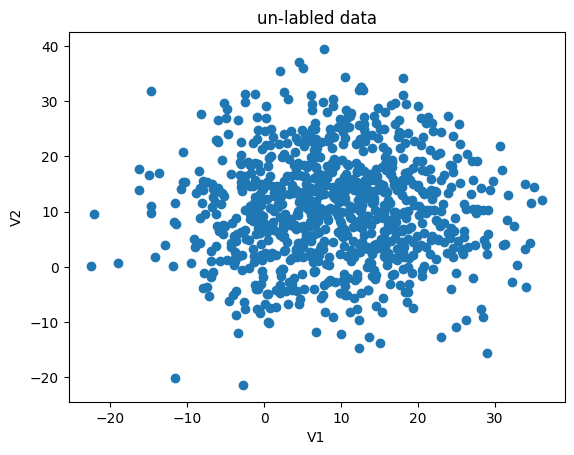

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

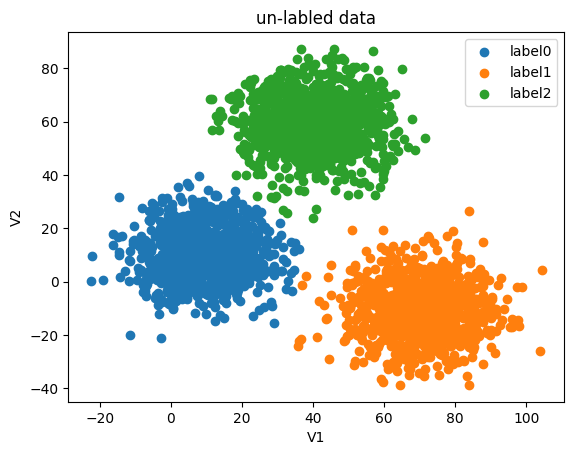

In [6]:
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [7]:
print(X.shape,Y.shape)

(3000, 2) (3000,)


In [8]:
#set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

C:\Data\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Data\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

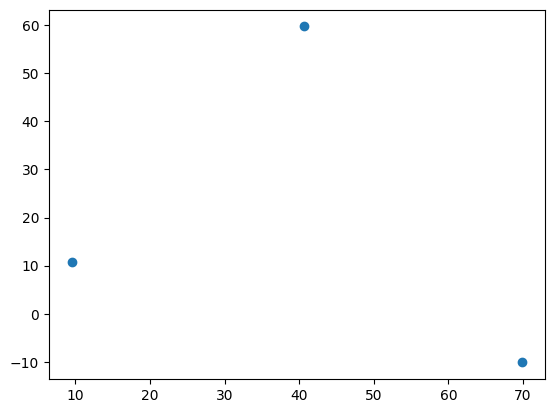

In [9]:
centers = KM.cluster_centers_
fig3 = plt.figure()
plt.scatter(centers[:,0],centers[:,1])
plt.show()

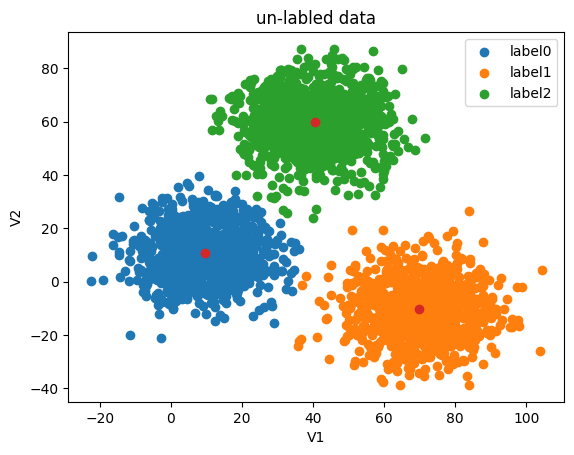

In [10]:
fig4 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [11]:
#test data: V1=80,V2=60
Y_predict_test = KM.predict([[80,60]])
print(Y_predict_test)

[1]


C:\Data\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [12]:
#predict based on training data
Y_predict = KM.predict(X)
print(pd.value_counts(Y_predict),pd.value_counts(Y))

1    1149
0     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,Y_predict)
print(accuracy)

0.0023333333333333335


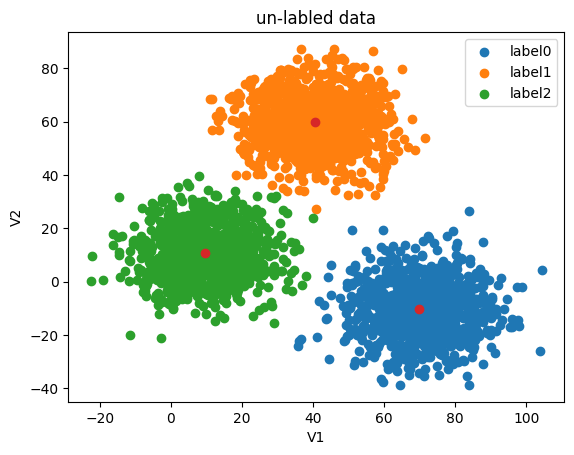

In [14]:
#viualize the data and result
fig5 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][Y_predict==0],X.loc[:,'V2'][Y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_predict==1],X.loc[:,'V2'][Y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_predict==2],X.loc[:,'V2'][Y_predict==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

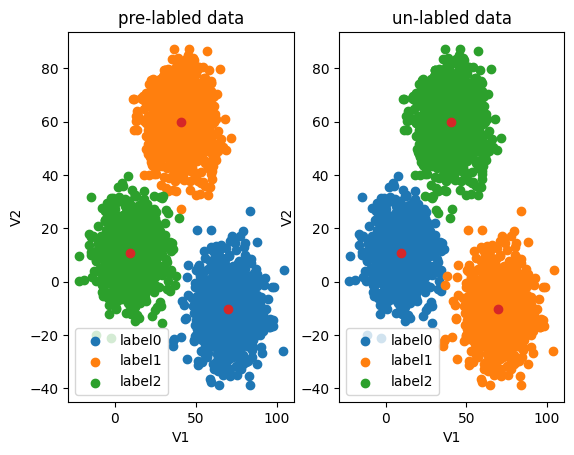

In [15]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y_predict==0],X.loc[:,'V2'][Y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_predict==1],X.loc[:,'V2'][Y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_predict==2],X.loc[:,'V2'][Y_predict==2])
plt.title("pre-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [16]:
#correct the results
Y_corrected = []
for i in Y_predict:
    if i==0:
        Y_corrected.append(1)
    elif i==1:
        Y_corrected.append(2)
    else:
        Y_corrected.append(0)
print(pd.value_counts(Y_corrected),pd.value_counts(Y))

2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [17]:
print(accuracy_score(Y,Y_corrected))

0.997


In [18]:
Y_corrected = np.array(Y_corrected)
print(type(Y_corrected))

<class 'numpy.ndarray'>


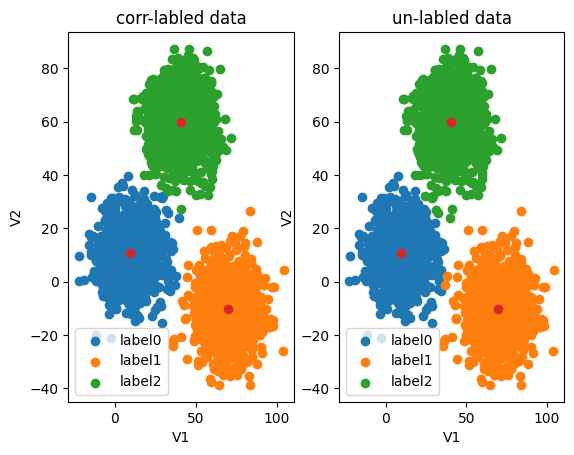

In [19]:
fig8 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y_corrected==0],X.loc[:,'V2'][Y_corrected==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_corrected==1],X.loc[:,'V2'][Y_corrected==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_corrected==2],X.loc[:,'V2'][Y_corrected==2])
plt.title("corr-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig9 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [22]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [25]:
#predict base on the test data: V1=80,V2=60
Y_predict_knn_test = KNN.predict([[80,60]])
Y_predict_knn = KNN.predict(X)
print(Y_predict_knn_test)
print('knn accuracy:',accuracy_score(Y,Y_predict_knn))

[2]
knn accuracy: 1.0


C:\Data\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
print(pd.value_counts(Y_predict_knn),pd.value_counts(Y))

2    1156
1     954
0     890
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


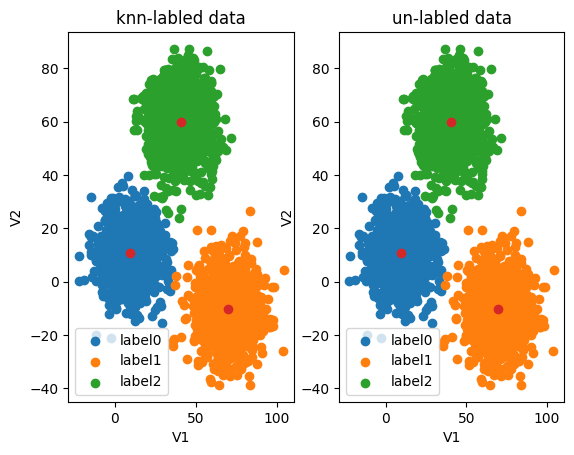

In [27]:
fig10 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y_predict_knn==0],X.loc[:,'V2'][Y_predict_knn==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_predict_knn==1],X.loc[:,'V2'][Y_predict_knn==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_predict_knn==2],X.loc[:,'V2'][Y_predict_knn==2])
plt.title("knn-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig11 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [29]:
#mean-shift
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500)
print(bw)

30.84663454820215


In [30]:
#establish the meanshift model
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [31]:
Y_predict_ms = ms.predict(X)
print(pd.value_counts(Y_predict_ms),pd.value_counts(Y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


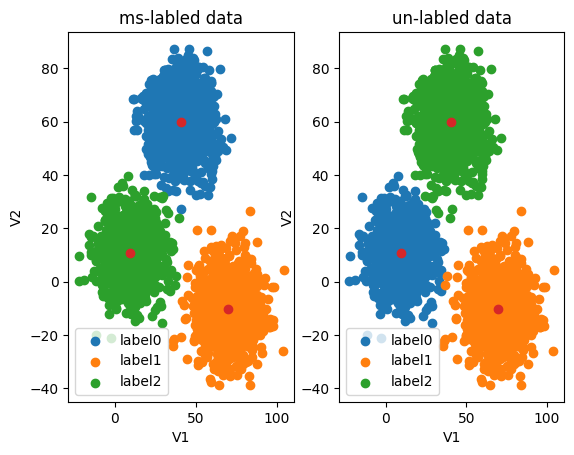

In [32]:
fig12 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y_predict_ms==0],X.loc[:,'V2'][Y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_predict_ms==1],X.loc[:,'V2'][Y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_predict_ms==2],X.loc[:,'V2'][Y_predict_ms==2])
plt.title("ms-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig13 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [34]:
#correct the results
Y_corrected_ms = []
for i in Y_predict_ms:
    if i==0:
        Y_corrected_ms.append(2)
    elif i==1:
        Y_corrected_ms.append(1)
    else:
        Y_corrected_ms.append(0)
print(pd.value_counts(Y_corrected_ms),pd.value_counts(Y))

2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [35]:
#convert the result to numpy array
Y_corrected_ms = np.array(Y_corrected_ms)
print(type(Y_corrected_ms))

<class 'numpy.ndarray'>


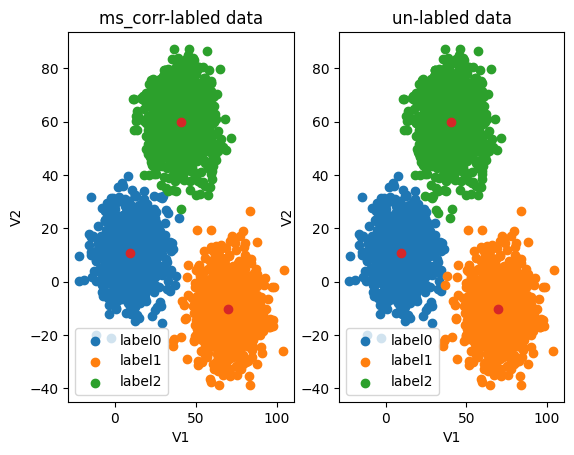

In [36]:
fig14 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y_corrected_ms==0],X.loc[:,'V2'][Y_corrected_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][Y_corrected_ms==1],X.loc[:,'V2'][Y_corrected_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][Y_corrected_ms==2],X.loc[:,'V2'][Y_corrected_ms==2])
plt.title("ms_corr-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig15 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()